In [2]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [3]:
from Utils import running_mean, multiple_runs_with_different_seed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import EvolutionStrategy as EvosStrat
importlib.reload(EvosStrat)
EvolutionStrategyClass = EvosStrat.EvolutionStrategy
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

In [4]:
Comp_config = {"objective_function": rana_func,
               "x_bounds" : (-500, 500),
                "x_length" : 5,
                "parent_number" : 10, 
                "child_to_parent_ratio" : 7,
                "bound_enforcing_method" : "not_clipping" ,
                "selection_method" :  "standard_mew_comma_lambda" ,
                "standard_deviation_clipping_fraction_of_range" : 0.01,
                "mutation_covariance_initialisation_fraction_of_range" : 0.01 , 
                "mutation_method" : "simple",
               "termination_min_abs_difference": 1e-6, 
              "maximum_archive_length": 100, "archive_minimum_acceptable_dissimilarity":0.1}
random_seed = 0

In [5]:
evo_comps = []
selection_methods = ["standard_mew_comma_lambda", "elitist"]
for selection_method in selection_methods:
    Comp_config["selection_method"] = selection_method
    np.random.seed(random_seed)
    evo_comp = EvolutionStrategyClass(**Comp_config)
    x_result, objective_result = evo_comp.run()
    print(f"x_result = {x_result} \n objective_result = {objective_result}\n\n\n\
      number of objective_evaluations is {evo_comp .objective_function_evaluation_count}\
      number of generations is {evo_comp.generation_number}")
    evo_comps.append(evo_comp)

max total iterations
x_result = [ 432.01314883 -406.44079786  487.47029769  459.07371999  -96.29216755] 
 objective_result = -1692.1356315536518


      number of objective_evaluations is 9940      number of generations is 142
max total iterations
x_result = [-447.56076084  282.72729229  228.53736452  479.01881055 -233.67320626] 
 objective_result = -1652.034140816064


      number of objective_evaluations is 9950      number of generations is 142


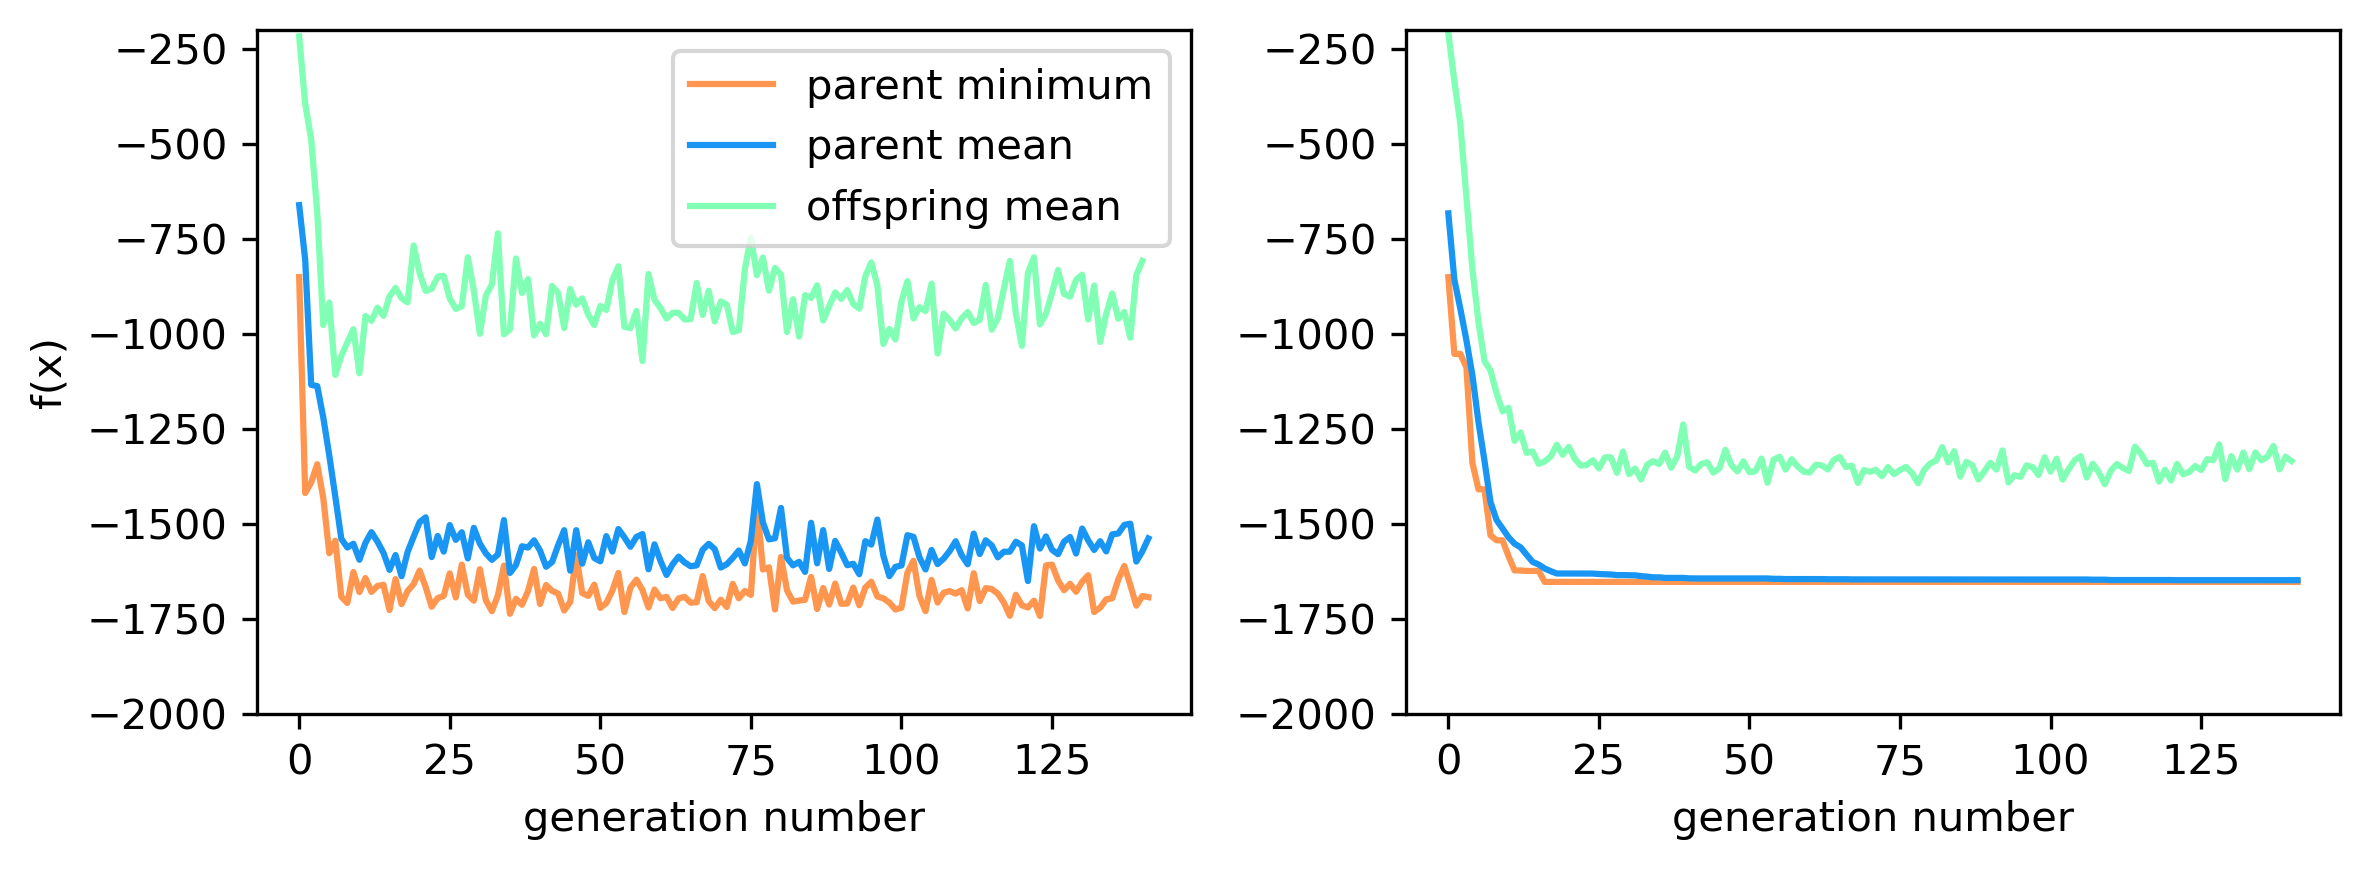

In [20]:
fig, axs = plt.subplots(1, 2, figsize = (8,3))
cols = mpl.cm.rainbow(np.linspace(0.2,0.8,3))
for i, selection_method in enumerate(selection_methods):
    specific_evo_comp = evo_comps[i]
    axs[i].plot(np.min(specific_evo_comp.parent_objective_history_array, axis=1), label="parent minimum", color=cols[2])
    axs[i].plot(np.mean(specific_evo_comp.parent_objective_history_array, axis=1), label="parent mean", color=cols[0])
    axs[i].plot(np.mean(specific_evo_comp.offspring_objective_history_array, axis=1), label="offspring mean", color=cols[1])
    axs[i].set_xlabel("generation number")
    axs[i].set_ylim(-2000, -200)
axs[0].set_ylabel("f(x)")
axs[0].legend()
fig.tight_layout()
fig.savefig("./Figures/ES5D_selection_method.png")